# House Price dataset of India : Regression

İlk olarak gerekli kütüphaneleri içe aktaralım.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRFRegressor

import warnings
warnings.filterwarnings('ignore')

Verimizi çekelim.

In [2]:
df = pd.read_csv("C:/Users/emird/OneDrive/Masaüstü/YEDEKLE/Veri Madenciligi/House Price India.csv") 

In [3]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

* id : id değerleri

* Date : tarih değerleri

* number of bedrooms : yatak oda sayısı

* number of bathrooms : banyo sayısı

* living area : oturma odası alanı (m^2)

* lot area : arsa alanı

* number of floors : kat sayısı ... gibi değişkenlerimiz verimizde mevcutur.

Tanımlayıcı istatistiklerine bakacak olursak :

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14620.0,6.762821e+09,6237.574799,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
Date,14620.0,4.260454e+04,67.347991,4.249100e+04,4.254600e+04,4.260000e+04,4.266200e+04,4.273400e+04
number of bedrooms,14620.0,3.379343e+00,0.938719,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14620.0,2.129583e+00,0.769934,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14620.0,2.098263e+03,928.275721,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14620.0,1.509328e+04,37919.621304,5.200000e+02,5.010750e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14620.0,1.502360e+00,0.540239,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14620.0,7.660739e-03,0.087193,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14620.0,2.331053e-01,0.766259,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14620.0,3.430506e+00,0.664151,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Peki verimizde eksik gözlem bulunmakta mıdır ?

In [6]:
df.isnull().any().sum()

0

Bu verisetinin değişkenlerinin dağılımlarına ve değişkenlerin birbirleri
arasındaki ilişkiye bakalım.

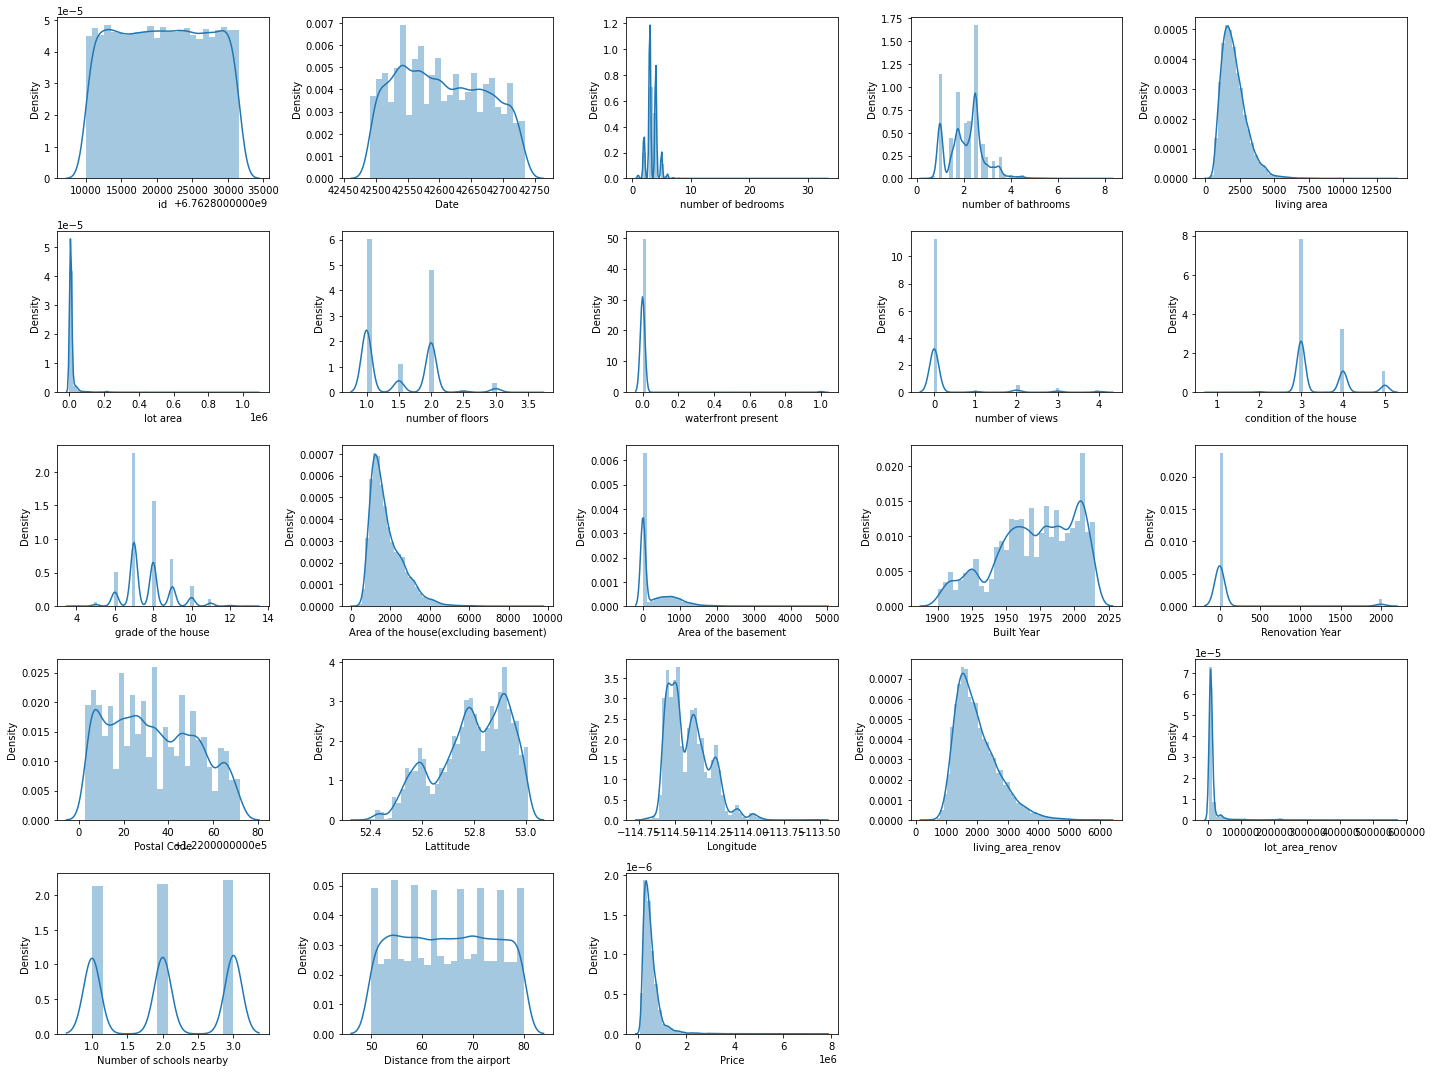

In [7]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in df:
    if plotnumber <=23:
        ax = plt.subplot(5,5,plotnumber)
        sbn.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber +=1
plt.tight_layout()
plt.show()

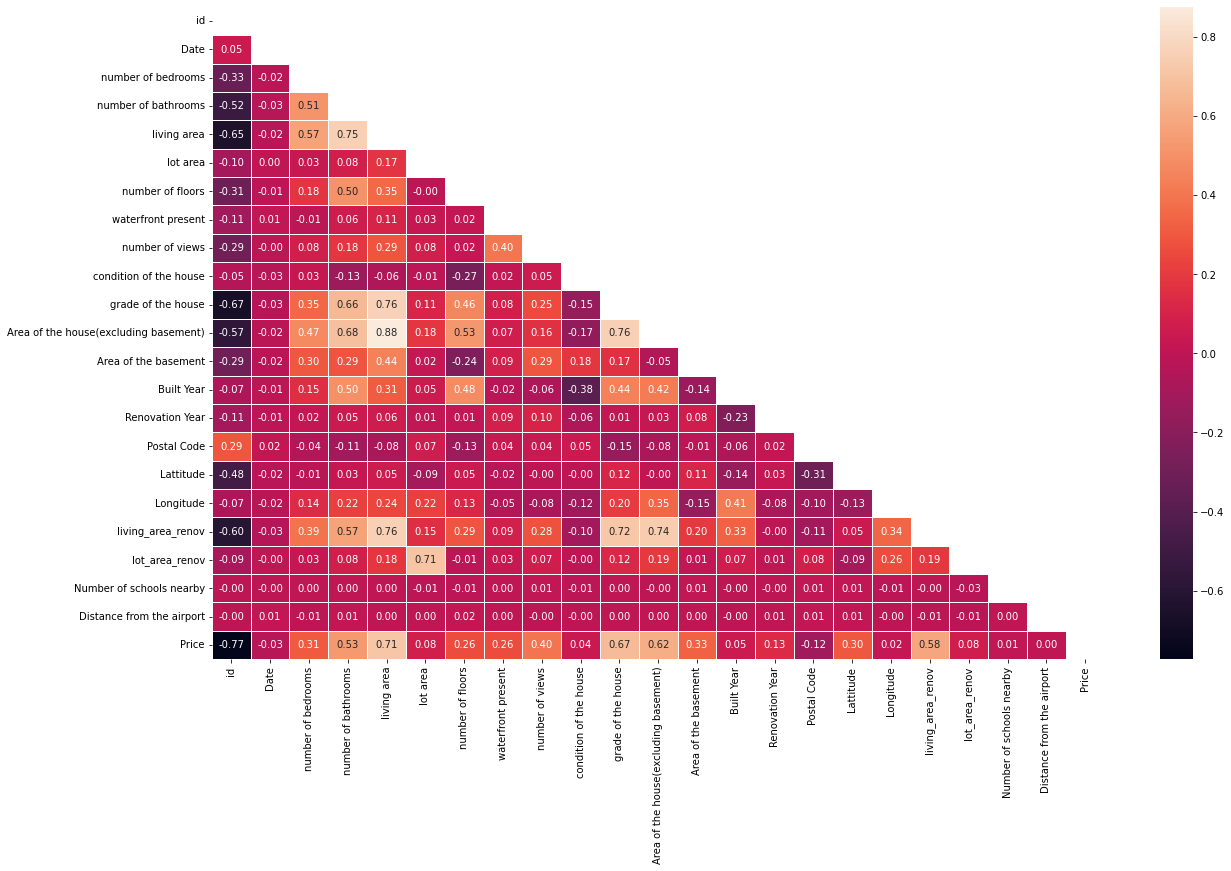

In [8]:
plt.figure(figsize = (20,12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sbn.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [9]:
y = df[["Price"]]
x = df[["living area"]]

# Lineer Regresyon

Bağımlı ve bağımsız verimiz arasındaki saçılım grafiğine bakmak
istersek :

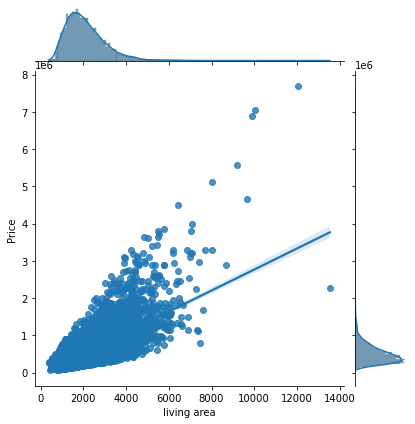

In [10]:
sbn.jointplot(x = "living area", y = "Price", data = df, kind = "reg")

In [11]:
lineer_model = LinearRegression()
lineer_model = lineer_model.fit(x,y)

In [12]:
lm_pred = lineer_model.predict(x)

R^2 ve MSE değerlerine bakalım.

In [13]:
lineer_model_mse = mean_squared_error(y, lm_pred)
lineer_model_r2 = r2_score(y, lm_pred)
print(lineer_model_mse, lineer_model_r2)

66564872888.14759 0.5071853635121747


Şimdi de çoklu doğrusal regresyon modelleri için verimizi yeniden düzenleyelim ve train, test olarak ayıralım.

In [14]:
y = df["Price"]

a = df.drop("id", axis=1)
b = a.drop("Date", axis=1)
c = b.drop("waterfront present", axis=1)
d = c.drop("Built Year", axis=1)
e = d.drop("Renovation Year", axis=1)
f = e.drop("Postal Code", axis=1)
g = f.drop("Lattitude", axis=1)
X = g.drop("Longitude", axis=1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=4386,
                                                    random_state=0)

# Çoklu Lineer Regresyon

In [16]:
coklu_lineer_model = LinearRegression()
coklu_lineer_model = coklu_lineer_model.fit(x_train, y_train)

Train setimizle tahmin değerlerimiz arasındaki grafiğe bakalım.

In [17]:
clm_fit = coklu_lineer_model.predict(x_train)

Model performansımıza bakalım.

In [18]:
coklu_lineer_model_train_mse = mean_squared_error(y_train, clm_fit)
coklu_lineer_model_train_r2 = r2_score(y_train, clm_fit)
print(coklu_lineer_model_train_mse, coklu_lineer_model_train_r2)

2.6645596461009466e-20 1.0


Tahmin performansımıza bakalım.

In [19]:
clm_pred = coklu_lineer_model.predict(x_test)

In [20]:
coklu_lineer_model_test_mse = mean_squared_error(y_test, clm_pred)
coklu_lineer_model_test_r2 = r2_score(y_test, clm_pred)
print(coklu_lineer_model_test_mse, coklu_lineer_model_test_r2)

2.820681513386259e-20 1.0


Mape değerine bakalım.

In [21]:
coklu_lineer_model_mape = mean_absolute_percentage_error(y_test, clm_pred)
print(coklu_lineer_model_mape)

2.4715245310504984e-16


# KNN Regresyon

In [22]:
KNN_model = KNeighborsRegressor().fit(x_train, y_train)

In [23]:
KNN_model.n_neighbors

5

k = 5 ile kurulan modelin performansına bakalım.

In [24]:
knn_fit = KNN_model.predict(x_train)

In [25]:
knn5_model_train_mse = mean_squared_error(y_train, knn_fit)
knn5_model_train_r2 = r2_score(y_train, knn_fit)
print(knn5_model_train_mse, knn5_model_train_r2)

489736077.92521393 0.9962696019936711


k = 5 ile kurulan modelin tahmin performansına bakalım.

In [26]:
knn_predict = KNN_model.predict(x_test)

In [27]:
knn5_model_test_mse = mean_squared_error(y_test, knn_predict)
knn5_model_test_r2 = r2_score(y_train, knn_fit)
print(knn5_model_test_mse, knn5_model_test_r2)

2531657424.6823797 0.9962696019936711


En iyi k değerini belirleyelim.

<AxesSubplot:>

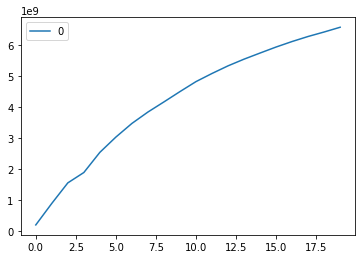

In [28]:
mse = []
r2 = []

for k in range(20):
    k = k+1
    KNN_model = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)
    y_fit_k = KNN_model.predict(x_test)
    mse.append(mean_squared_error(y_test, y_fit_k))
    r2.append(r2_score(y_test, y_fit_k))
    
mse_df = pd.DataFrame(mse)
mse_df.plot()

In [74]:
?KNN_model

In [29]:
KNN_arg = KNeighborsRegressor()
k_params = {"n_neighbors":np.arange(1,80)}
KNN_model = GridSearchCV(KNN_arg, k_params, cv = 10)
KNN_model.fit(x_train, y_train)
KNN_model.best_params_

{'n_neighbors': 1}

En iyi k değeri 1 olarak çıkmıştır. Şimdi k=1 olan en iyi modeli kuralım.

In [30]:
KNN_best_model = KNeighborsRegressor(n_neighbors=1).fit(x_train, y_train)

En iyi k değeri(k=1) ile kurulan modelin performansına bakalım.

In [31]:
knn1_fit = KNN_best_model.predict(x_train)

In [32]:
knn1_bestmodel_train_mse = mean_squared_error(y_train, knn1_fit)
knn1_bestmodel_train_r2 = r2_score(y_train, knn1_fit)
print(knn1_bestmodel_train_mse, knn1_bestmodel_train_r2)

0.0 1.0


En iyi k değeri(k=1) ile kurulan modelin tahmin performansına bakalım.

In [33]:
knn1_pred = KNN_best_model.predict(x_test)

In [34]:
knn1_bestmodel_test_mse = mean_squared_error(y_test, knn1_pred)
knn1_bestmodel_test_r2 = r2_score(y_test, knn1_pred)
print(knn1_bestmodel_test_mse, knn1_bestmodel_test_r2)

186777067.36434108 0.9987020563246968


Şimdi knn için kurulan(k=5 ve k=1) 2 modelin tahmin performanslarını karşılaştıralım.

In [35]:
knn5_model_test_mse > knn1_bestmodel_test_mse
knn5_model_test_r2 < knn1_bestmodel_test_r2

True

Görüldüğü üzere k=1 için kurulan KNN modeli hem mse değerlerine hem de r2 değerine göre daha iyi çıkmıştır.

MAPE değerine bakalım.

In [36]:
knn_model_mape = mean_absolute_percentage_error(y_test, knn1_pred)
print(knn_model_mape)

0.002701396279470573


# Random Forest Regresyon

In [37]:
rf_model = RandomForestRegressor().fit(x_train, y_train)

Model performansımıza bakalım.

In [38]:
rf_fit = rf_model.predict(x_train)

In [39]:
rf_model_train_mse = mean_squared_error(y_train, rf_fit)
rf_model_train_r2 = r2_score(y_train, rf_fit)
print(rf_model_train_mse, rf_model_train_r2)

92717455.3032321 0.9992937563189538


Tahmin performansımıza bakalım.

In [40]:
rf_predict = rf_model.predict(x_test)

In [41]:
rf_model_test_mse = mean_squared_error(y_test, rf_predict)
rf_model_test_r2 = r2_score(y_test, rf_predict)
print(rf_model_test_mse, rf_model_test_r2)

1217729037.997623 0.9915378064052209


Modelimizi optimize edelim.

In [45]:
?rf_model

In [42]:
rf_params = {"max_depth" : range(1,10),
             "max_features" : [2,3,5,8],
             "n_estimators" : [100,250]}
grid_rf_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1,
                            verbose=2)
grid_rf_model.fit(x_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': [2, 3, 5, 8],
                         'n_estimators': [100, 250]},
             verbose=2)

In [43]:
grid_rf_model.best_params_

{'max_depth': 9, 'max_features': 8, 'n_estimators': 250}

In [44]:
best_rf_model = RandomForestRegressor(max_depth=9, max_features=8,
                                      n_estimators=250).fit(x_train, y_train)

En iyi parametrelerle kurulan modelimizin performansına bakalım.

In [45]:
best_rf_fit = best_rf_model.predict(x_train)

In [46]:
best_rf_model_train_mse = mean_squared_error(y_train, best_rf_fit)
best_rf_model_train_r2 = r2_score(y_train, best_rf_fit)
print(best_rf_model_train_mse, best_rf_model_train_r2)

200097242.0325482 0.9984758273151685


En iyi parametrelerle kurulan modelimizin tahmin performansına bakalım.

In [47]:
best_rf_predict = best_rf_model.predict(x_test)

In [48]:
best_rf_model_test_mse = mean_squared_error(y_test, best_rf_predict)
best_rf_model_test_r2 = r2_score(y_test, best_rf_predict)
print(best_rf_model_test_mse, best_rf_model_test_r2)

2280577643.086146 0.984151901678017


# Gradient Boosting Regresyon

In [49]:
gb_model = GradientBoostingRegressor().fit(x_train, y_train)

Model performansımıza bakalım.

In [50]:
gb_fit = gb_model.predict(x_train)

In [51]:
gb_model_train_mse = mean_squared_error(y_train, gb_fit)
gb_model_train_r2 = r2_score(y_train, gb_fit)
print(gb_model_train_mse, gb_model_train_r2)

11418845.02675419 0.999913020831745


Tahmin performansımıza bakalım.

In [52]:
gb_predict = gb_model.predict(x_test)

In [53]:
gb_model_test_mse = mean_squared_error(y_test, gb_predict)
gb_model_test_r2 = r2_score(y_test, gb_predict)
print(gb_model_test_mse, gb_model_test_r2)

178701292.14613575 0.9987581761766441


Modelimizi optimize edelim.

In [60]:
?gb_model

In [54]:
gb_params = {"learning_rate" : [0.01, 0.05, 0.1],
             "max_depth" : [3,5,10,15,30],
             "n_estimators" : [100,200,300],
             "subsample" : [1,0.5]}

In [56]:
grid_gb_model = GridSearchCV(gb_model, gb_params, cv=10, 
                            n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits



KeyboardInterrupt



In [63]:
grid_gb_model.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}

In [57]:
best_gb_model = GradientBoostingRegressor(learning_rate=0.05,
                                          max_depth=3,
                                          n_estimators=300,
                                          subsample=1).fit(x_train, y_train)

En iyi parametrelerle kurulan modelimizin performansına bakalım.

In [58]:
best_gb_model_fit = best_gb_model.predict(x_train) 

In [59]:
best_gb_model_train_mse = mean_squared_error(y_train, best_gb_model_fit)
best_gb_model_train_r2 = r2_score(y_train, best_gb_model_fit)
print(best_gb_model_train_mse, best_gb_model_train_r2)

1950152.5212112141 0.9999851453764486


En iyi parametrelerle kurulan modelimizin tahmin performansına bakalım.

In [60]:
best_gb_model_predict = best_gb_model.predict(x_test)

In [61]:
best_gb_model_test_mse = mean_squared_error(y_test, best_gb_model_predict)
best_gb_model_test_r2 = r2_score(y_test, best_gb_model_predict)
print(best_gb_model_test_mse, best_gb_model_test_r2)

164615592.2996599 0.9988560599548078


# XGboost Regresyon

In [62]:
xgb_model = XGBRFRegressor().fit(x_train, y_train)

Model performansımıza bakalım.

In [63]:
xgb_fit = xgb_model.predict(x_train)

In [64]:
xgb_model_train_mse = mean_squared_error(y_train, xgb_fit)
xgb_model_train_r2 = r2_score(y_train, xgb_fit)
print(xgb_model_train_mse, xgb_model_train_r2)

100884225.93407838 0.9992315487213258


Modelimizin tahmin performansına bakalım.

In [65]:
xgb_predict = xgb_model.predict(x_test)

In [66]:
xgb_model_test_mse = mean_squared_error(y_test, xgb_predict)
xgb_model_test_r2 = r2_score(y_test, xgb_predict)
print(xgb_model_test_mse, xgb_model_test_r2)

1387543801.415325 0.9903577364894577


Modelimizi optimize edelim.

In [75]:
?xgb_model

In [77]:
xgb_params = {"colsample_bytree" : [0.1,0.5,1,2,4],
              "n_estimators" : [100,200,400,800,1600],
              "max_depth" : [2,3,4],
              "learning_rate" : [0.1,0.5,0.8]}
grid_xgb_model = GridSearchCV(xgb_model, xgb_params, cv=10,
                              n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits


In [78]:
grid_xgb_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.8,
 'max_depth': 4,
 'n_estimators': 1600}

In [67]:
best_xgb_model = XGBRFRegressor(colsample_bytree=1,
                                learning_rate=0.8, max_depth=4,
                                n_estimators=1600).fit(x_train, y_train)

En iyi parametrelerle kurulan modelimizin performansına bakalım.

In [68]:
best_xgb_model_fit = best_xgb_model.predict(x_train)

In [69]:
best_xgb_model_train_mse = mean_squared_error(y_train, best_xgb_model_fit)
best_xgb_model_train_r2 = r2_score(y_train, best_xgb_model_fit)
print(best_xgb_model_train_mse, best_xgb_model_train_r2)

19129317761.643932 0.8542889281451613


En iyi parametrelerle kurulan modelimizin tahmin performansına bakalım.

In [70]:
best_xgb_model_predict = best_xgb_model.predict(x_test)

In [71]:
best_xgb_model_test_mse = mean_squared_error(y_test, best_xgb_model_predict)
best_xgb_model_test_r2 = r2_score(y_test, best_xgb_model_predict)
print(best_xgb_model_test_mse, best_xgb_model_test_r2)

22397850812.81934 0.8443537570585322


# Decision Tree Regresyon

In [72]:
dt_model = DecisionTreeRegressor().fit(x_train, y_train)

Modelimizin performansına bakalım.

In [73]:
dt_model_fit = dt_model.predict(x_train)

In [74]:
dt_model_train_mse = mean_squared_error(y_train, dt_model_fit)
dt_model_train_r2 = r2_score(y_train, dt_model_fit)
print(dt_model_train_mse, dt_model_train_r2)

0.0 1.0


Modelimizin tahmin performansına bakalım.

In [75]:
dt_model_predict = dt_model.predict(x_test)

In [76]:
dt_model_test_mse = mean_squared_error(y_test, dt_model_predict)
dt_model_test_r2 = r2_score(y_test, dt_model_predict)
print(dt_model_test_mse, dt_model_test_r2)

328598693.8974008 0.9977165151885318


Modelimizi optimize edelim.

In [89]:
?dt_model

In [90]:
dt_params = {"min_samples_split" : range(2,200),
             "max_leaf_nodes" : range(2,80)}
grid_dt_model = GridSearchCV(dt_model, dt_params, cv=10,
                             n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 15444 candidates, totalling 154440 fits


In [91]:
grid_dt_model.best_params_

{'max_leaf_nodes': 72, 'min_samples_split': 2}

In [77]:
best_dt_model = DecisionTreeRegressor(max_leaf_nodes=72,
                                      min_samples_split=2).fit(x_train,
                                                               y_train)

En iyi parametrelerle kurulan modelimizin performansına bakalım.

In [78]:
best_dt_model_fit = best_dt_model.predict(x_train)

In [79]:
best_dt_model_train_mse = mean_squared_error(y_train, best_dt_model_fit)
best_dt_model_train_r2 = r2_score(y_train, best_dt_model_fit)
print(best_dt_model_train_mse, best_dt_model_train_r2)

61040067.99334941 0.9995350480427881


En iyi parametrelerle kurulan modelimizin tahmin performansına bakalım.

In [80]:
best_dt_model_predict = best_dt_model.predict(x_test)

In [81]:
best_dt_model_test_mse = mean_squared_error(y_test, best_dt_model_predict)
best_dt_model_test_r2 = r2_score(y_test, best_dt_model_predict)
print(best_dt_model_test_mse, best_dt_model_test_r2)

397020758.2417261 0.9972410393342415


# MLP Regresyon

Bunun için öncelikle standartlaştırma uygulayalım.

In [83]:
scl = StandardScaler()

In [84]:
scl.fit(x_train)

StandardScaler()

In [85]:
x_train_scl = scl.transform(x_train)
x_test_scl = scl.transform(x_test)

In [86]:
ann_model = MLPRegressor().fit(x_train_scl, y_train)

In [87]:
ann_model.n_layers_

3

In [90]:
ann_model.hidden_layer_sizes

(100,)

Modelimizin performansına bakalım.

In [91]:
ann_model_fit = ann_model.predict(x_train_scl)

In [92]:
ann_model_train_mse = mean_squared_error(y_train, ann_model_fit)
ann_model_train_r2 = r2_score(y_train, ann_model_fit)
print(ann_model_train_mse, ann_model_train_r2)

359640085021.52466 -1.7394360281643544


Modelimizin tahmin performansına bakalım.

In [93]:
ann_model_predict = ann_model.predict(x_test_scl)

In [94]:
ann_model_test_mse = mean_squared_error(y_test, ann_model_predict)
ann_model_test_r2 = r2_score(y_test, ann_model_predict)
print(ann_model_test_mse, ann_model_test_r2)

368284008556.1938 -1.5592644020285582


In [96]:
ann_params = {"alpha" : [0.5,0.3,0.1,0.01,0.005],
              "hidden_layer_sizes" : [(20,20),(100,50,150),(300,200,100)],
              "activation" : ["relu", "logistic"]}
grid_ann_model = GridSearchCV(ann_model, ann_params, 
                              cv=5, n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [97]:
grid_ann_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (20, 20)}

In [102]:
best_ann_model = MLPRegressor(activation="relu", alpha=0.1,
                              hidden_layer_sizes=(20,20)).fit(x_train_scl, y_train)

En iyi parametrelerle kurulan modelimizin performansına bakalım.

In [103]:
best_ann_model_fit = best_ann_model.predict(x_train_scl)

In [104]:
best_ann_model_train_mse = mean_squared_error(y_train, best_ann_model_fit)
best_ann_model_train_r2 = r2_score(y_train, best_ann_model_fit)
print(best_ann_model_train_mse, best_ann_model_train_r2)

35011369102.706436 0.7333128038005721


En iyi parametrelerle kurulan modelimizin tahmin performansına bakalım.

In [105]:
best_ann_model_predict = best_ann_model.predict(x_test_scl)

In [106]:
best_ann_model_test_mse = mean_squared_error(y_test, best_ann_model_predict)
best_ann_model_test_r2 = r2_score(y_test, best_ann_model_predict)
print(best_ann_model_test_mse, best_ann_model_test_r2)

33760536840.19575 0.7653926368749644


Kurulan bu modellerden hangisi ya da hangileri daha iyi görmek isterse :

In [107]:
models = pd.DataFrame({
    "Regresyon Modelleri" : ["Lineer Regresyon", "Çoklu Lineer Regresyon",
                             "KNN Regresyon", "KNN Regresyon(best params)",
                             "Random Forest Regresyon",
                             "Random Forest Regresyon(best params)",
                             "Gradient Boosting Regresyon",
                             "Gradient Boosting Regresyon(best params)",
                             "XGboost Regresyon",
                             "XGboost Regresyon(best params)",
                             "Decision Tree Regresyon",
                             "Decision Tree Regresyon(best params)",
                             "MLP Regresyon",
                             "MLP Regresyon(best params)"],
     "r2 Score" : [lineer_model_r2, coklu_lineer_model_test_r2,
                   knn5_model_test_r2, knn1_bestmodel_test_r2,
                   rf_model_test_r2, best_rf_model_test_r2,
                   gb_model_test_r2, best_gb_model_test_r2,
                   xgb_model_test_r2, best_xgb_model_test_r2,
                   dt_model_test_r2, best_dt_model_test_r2,
                   ann_model_test_r2, best_ann_model_test_r2]
})

models.sort_values(by = "r2 Score", ascending = False)

,Regresyon Modelleri,r2 Score
1,Çoklu Lineer Regresyon,1.000000
7,Gradient Boosting Regresyon(best params),0.998856
6,Gradient Boosting Regresyon,0.998758
3,KNN Regresyon(best params),0.998702
10,Decision Tree Regresyon,0.997717
11,Decision Tree Regresyon(best params),0.997241
2,KNN Regresyon,0.996270
4,Random Forest Regresyon,0.991538
8,XGboost Regresyon,0.990358
5,Random Forest Regresyon(best params),0.984152


In [112]:
models2 = pd.DataFrame({
    "Regresyon Modelleri" : ["Lineer Regresyon", "Çoklu Lineer Regresyon",
                             "KNN Regresyon", "KNN Regresyon(best params)",
                             "Random Forest Regresyon",
                             "Random Forest Regresyon(best params)",
                             "Gradient Boosting Regresyon",
                             "Gradient Boosting Regresyon(best params)",
                             "XGboost Regresyon",
                             "XGboost Regresyon(best params)",
                             "Decision Tree Regresyon",
                             "Decision Tree Regresyon(best params)",
                             "MLP Regresyon",
                             "MLP Regresyon(best params)"],
     "MSE" : [lineer_model_mse, coklu_lineer_model_test_mse,
                   knn5_model_test_mse, knn1_bestmodel_test_mse,
                   rf_model_test_mse, best_rf_model_test_mse,
                   gb_model_test_mse, best_gb_model_test_mse,
                   xgb_model_test_mse, best_xgb_model_test_mse,
                   dt_model_test_mse, best_dt_model_test_mse,
                   ann_model_test_mse, best_ann_model_test_mse]
})

models2.sort_values(by = "MSE", ascending = True)

,Regresyon Modelleri,MSE
1,Çoklu Lineer Regresyon,2.820682e-20
7,Gradient Boosting Regresyon(best params),1.646156e+08
6,Gradient Boosting Regresyon,1.787013e+08
3,KNN Regresyon(best params),1.867771e+08
10,Decision Tree Regresyon,3.285987e+08
11,Decision Tree Regresyon(best params),3.970208e+08
4,Random Forest Regresyon,1.217729e+09
8,XGboost Regresyon,1.387544e+09
5,Random Forest Regresyon(best params),2.280578e+09
2,KNN Regresyon,2.531657e+09


Bu tablolara göre çıkarımlar yapmak mümkündür. Elimizdeki veriye hangi regresyon modeli daha uygunsa seçebilir ve bu regresyon modeline göre işlemler uygulayabiliriz.